In [1]:
import numpy as np

x = [-1, 3, -2, 1, 0]
h = [-5, 2, -1, -9, 7]

y = np.convolve(x, h)

print("x =", x)
print("h =", h)
print("\nConvolution (y = x * h):")
print(y)

x = [-1, 3, -2, 1, 0]
h = [-5, 2, -1, -9, 7]

Convolution (y = x * h):
[  5 -17  17  -3 -30  38 -23   7   0]


In [2]:
print("Potek konvolucije:\n")
for n in range(len(y)):
    h_start = max(0, n - len(x) + 1)
    h_end = min(n + 1, len(h))
    h_indices = list(range(h_start, h_end))
    x_indices = list(range(len(h_indices)-1, -1, -1))
    
    h_vals = [h[i] for i in h_indices]
    x_vals = [x[i] for i in x_indices]
    products = [h_vals[i] * x_vals[i] for i in range(len(h_vals))]
    
    calc = ' + '.join([f'({h_vals[i]}×{x_vals[i]})' for i in range(len(products))])
    print(f"Korak {n} = {calc} = {int(y[n])}")

print("\nRezultat konvolucije x * h:\n")
print("x =", x)
print("h =", h)
print(f"Rezultat:", y)

Potek konvolucije:

Korak 0 = (-5×-1) = 5
Korak 1 = (-5×3) + (2×-1) = -17
Korak 2 = (-5×-2) + (2×3) + (-1×-1) = 17
Korak 3 = (-5×1) + (2×-2) + (-1×3) + (-9×-1) = -3
Korak 4 = (-5×0) + (2×1) + (-1×-2) + (-9×3) + (7×-1) = -30
Korak 5 = (2×1) + (-1×-2) + (-9×3) + (7×-1) = 38
Korak 6 = (-1×-2) + (-9×3) + (7×-1) = -23
Korak 7 = (-9×3) + (7×-1) = 7
Korak 8 = (7×-1) = 0

Rezultat konvolucije x * h:

x = [-1, 3, -2, 1, 0]
h = [-5, 2, -1, -9, 7]
Rezultat: [  5 -17  17  -3 -30  38 -23   7   0]


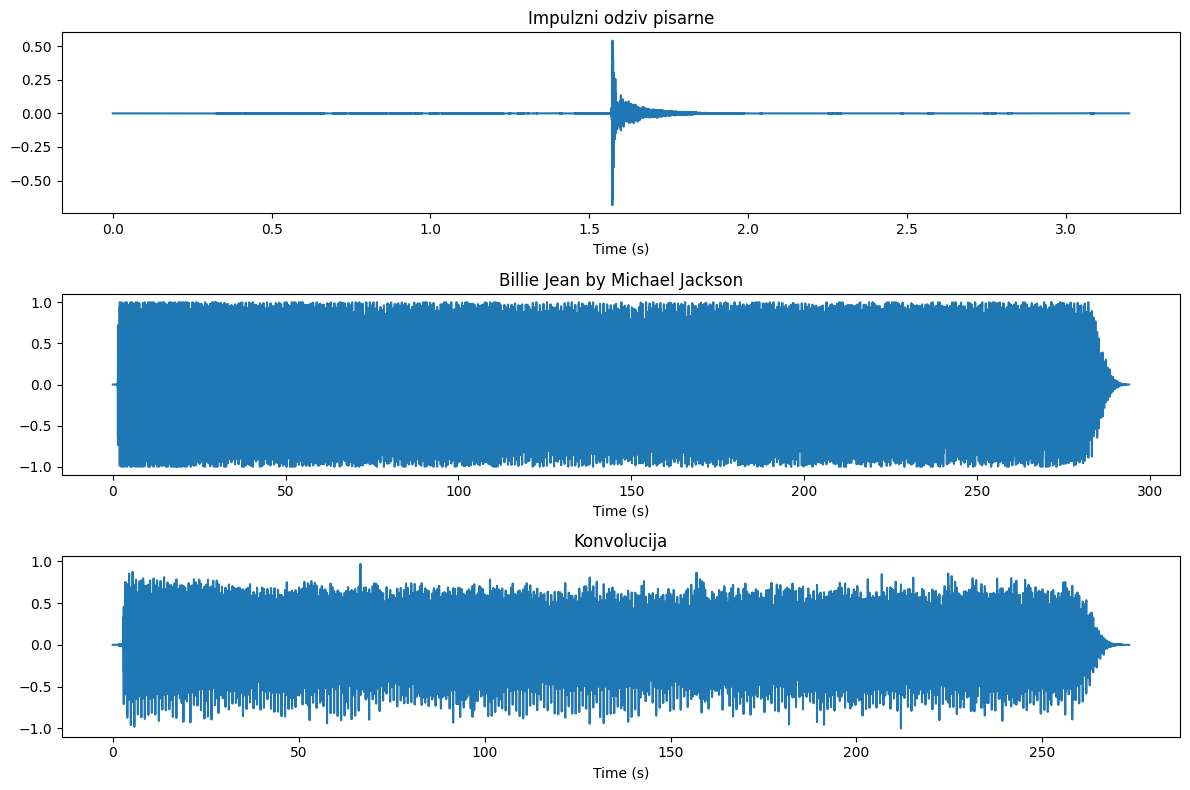

Playing convolution. Press 'esc' to stop.
Playback stopped.


In [ ]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
import sounddevice as sd
from scipy.signal import resample
import threading
import keyboard  # pip install keyboard
import time
from scipy.io.wavfile import write


save_result = False
# --------------------------
# 1. Load MP3 files
# --------------------------
# soundfile uses audioread backend to read MP3s without FFmpeg
y1, sr1 = sf.read(r"C:\Users\Jernej Kusar\Documents\ŠOLA 2025-2026 1. semester\THAM\Lab. vaje\4. vaja\porocilo\impulz_pisarna.wav")
y2, sr2 = sf.read(r"C:\Users\Jernej Kusar\Documents\ŠOLA 2025-2026 1. semester\THAM\Lab. vaje\4. vaja\porocilo\Billie Jean by Michael Jackson w Lyrics.wav")

# Ensure both sample rates match
# Suppose y1 has sr1, y2 has sr2
if sr1 != sr2:
    # Resample y2 to match sr1
    num_samples = int(len(y2) * sr1 / sr2)
    y2_resampled = resample(y2, num_samples)
else:
    y2_resampled = y2

# Convert to mono if stereo
if y1.ndim == 2:
    y1 = y1.mean(axis=1)
if y2.ndim == 2:
    y2 = y2.mean(axis=1)

# --------------------------
# 2. Convolve the signals
# --------------------------
conv_signal = convolve(y1, y2, mode='full')

# Normalize for playback
conv_signal = conv_signal / np.max(np.abs(conv_signal))

# --------------------------
# 3. Create time axes for plotting
# --------------------------
t1 = np.linspace(0, len(y1)/sr1, len(y1))
t2 = np.linspace(0, len(y2)/sr2, len(y2))
t_conv = np.linspace(0, len(conv_signal)/sr1, len(conv_signal))

# --------------------------
# 4. Plot the signals
# --------------------------
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t1, y1)
plt.title("Impulzni odziv pisarne")
plt.xlabel("Time (s)")

plt.subplot(3, 1, 2)
plt.plot(t2, y2)
plt.title("Billie Jean by Michael Jackson")
plt.xlabel("Time (s)")

plt.subplot(3, 1, 3)
plt.plot(t_conv, conv_signal)
plt.title("Konvolucija")
plt.xlabel("Time (s)")

plt.tight_layout()
plt.show()

# --------------------------
# 5. Play and save the convolved signal
# --------------------------

if save_result:
    write(r"C:\Users\Jernej Kusar\Documents\ŠOLA 2025-2026 1. semester\THAM\Lab. vaje\4. vaja\porocilo\Bilie_Jean_pisarna.wav", sr1, (conv_signal * 32767).astype(np.int16))

def play_audio():
    sd.play(conv_signal, sr1)
    sd.wait()  # Wait until playback finishes

# Start playback in a thread
threading.Thread(target=play_audio).start()
print("Playing convolution. Press 'esc' to stop.")

while True:
    if keyboard.is_pressed('esc'):  # Stop key
        sd.stop()
        print("Playback stopped.")
        break
    time.sleep(0.1)  # Avoid high CPU usage
